# Phase 2 - Sleep Disorder Analysis 

The goal of the code is to build and evaluate classification models for predicting three different sleep-related conditions: disorder, sleep apnea (slpapnea5), and insomnia (insmnia5). It uses Logistic Regression as the classification model and evaluates its performance using standard metrics like accuracy, precision, recall, and F1-score.

In [54]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset - add the path from whcih files needs to read
file_path = 'data/output1.csv'
sleep_data = pd.read_csv(file_path)

# Fill missing values with the mean
sleep_data_filled = sleep_data.fillna(sleep_data.mean())


sleep_data_filled.head()
   

,mesaid,gender1,nsrr_age,Latency start sleep to REM [min],Arousal index,NoREM1%,NoREM2%,NoREM3%,REM%,sleep time,sleep latency,nsrr_bmi,insmnia5,slpapnea5,disorder
0,1,0,70,67.0,27.03,19.70,66.2,2.77,11.4,344.0,26.00000,22.01,0,0,0
1,2,0,83,54.0,24.55,6.55,48.4,20.90,24.2,374.0,45.41393,21.90,0,0,0
2,6,0,57,21.0,21.79,19.70,53.1,10.50,16.6,358.0,45.41393,56.01,0,0,0
3,10,1,57,0.0,46.91,9.13,57.5,33.30,0.0,110.0,45.41393,19.84,0,1,1
4,12,1,80,138.0,28.79,15.60,69.0,2.94,12.5,273.0,12.00000,27.77,0,0,0


In [55]:
# Detect outliers using Z-Score
import pandas as pd
import numpy as np
from scipy import stats

z_scores = stats.zscore(sleep_data_filled.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)


In [56]:
Q1 = sleep_data_filled.quantile(0.25)
Q3 = sleep_data_filled.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (sleep_data_filled < (Q1 - 1.5 * IQR)) | (sleep_data_filled > (Q3 + 1.5 * IQR))

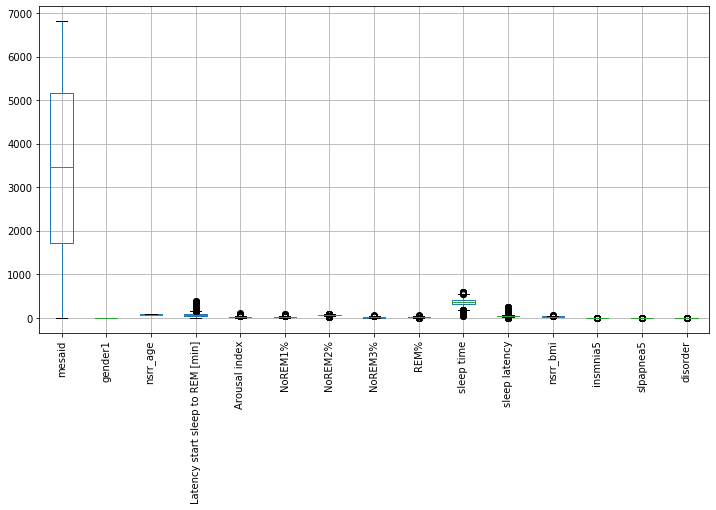

In [57]:
import matplotlib.pyplot as plt

# Box plot for each feature
sleep_data_filled.boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.show()

In [58]:
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# provide the path where pkl files needs to written / saved
main_folder = 'data/files/'
models_folder = os.path.join(main_folder, 'models')

# Ensure the folder exists, if not, create it
if not os.path.exists(models_folder):
    print(f"Creating models folder at: {models_folder}")
    os.makedirs(models_folder)
else:
    print(f"Saving models to existing folder: {models_folder}")

# function to train and evaluate merics

def train_and_evaluate(model, X, y, target_name):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Building and training the model
    formatted_name = target_name.replace("(", "").replace(")", "").lower()
    model_file_path = os.path.join(models_folder, f'{formatted_name}.pkl')
    
    # Save the model to a pickle file
    try:
        with open(model_file_path, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved successfully to: {model_file_path}")
    except Exception as e:
        print(f"Error saving model: {e}")

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Generating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    # Print the results
    print(f"Metrics for {target_name}:")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    #print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    


# Features (X) for all targets
X = sleep_data_filled.drop(columns=['disorder', 'slpapnea5', 'insmnia5'])

# Logistic Regression
lr_model = model = LogisticRegression(max_iter=1000, class_weight='balanced')

train_and_evaluate(lr_model, X, sleep_data_filled['disorder'], 'disorder_logistic_regression')
train_and_evaluate(lr_model, X, sleep_data_filled['slpapnea5'], 'sleep_apnea_logistic_regression')
train_and_evaluate(lr_model, X, sleep_data_filled['insmnia5'], 'insomnia_logistic_regression')



Saving models to existing folder: C:/Dinesh/24-T2/Mywork/files/models
Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\disorder_logistic_regression.pkl
Metrics for disorder_logistic_regression:
[[253 133]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       386
           1       0.20      0.55      0.30        62

    accuracy                           0.64       448
   macro avg       0.55      0.60      0.53       448
weighted avg       0.80      0.64      0.69       448

Accuracy: 0.64
Precision: 0.20
Recall: 0.55
F1 Score: 0.30


Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\sleep_apnea_logistic_regression.pkl
Metrics for sleep_apnea_logistic_regression:
[[284 122]
 [ 19  23]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       406
           1       0.16      0.55      0.25        42

    accuracy                           0.69   

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
train_and_evaluate(rf_model, X, sleep_data_filled['disorder'], 'disorder_random_forest')
train_and_evaluate(rf_model, X, sleep_data_filled['slpapnea5'], 'sleep_apnea_random_forest')
train_and_evaluate(rf_model, X, sleep_data_filled['insmnia5'], 'insomnia_random_forest')

Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\disorder_random_forest.pkl
Metrics for disorder_random_forest:
[[377   9]
 [ 56   6]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       386
           1       0.40      0.10      0.16        62

    accuracy                           0.85       448
   macro avg       0.64      0.54      0.54       448
weighted avg       0.81      0.85      0.81       448

Accuracy: 0.85
Precision: 0.40
Recall: 0.10
F1 Score: 0.16


Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\sleep_apnea_random_forest.pkl
Metrics for sleep_apnea_random_forest:
[[402   4]
 [ 37   5]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       406
           1       0.56      0.12      0.20        42

    accuracy                           0.91       448
   macro avg       0.74      0.55      0.57       448
weighted avg       0.88      0.9

In [60]:
from sklearn.svm import SVC
svc_model = SVC()

train_and_evaluate(svc_model, X, sleep_data_filled['disorder'], 'disorder_svc')
train_and_evaluate(svc_model, X, sleep_data_filled['slpapnea5'], 'sleep_apnea_svc')
train_and_evaluate(svc_model, X, sleep_data_filled['insmnia5'], 'insomnia_svc')

Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\disorder_svc.pkl
Metrics for disorder_svc:
[[386   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       386
           1       0.00      0.00      0.00        62

    accuracy                           0.86       448
   macro avg       0.43      0.50      0.46       448
weighted avg       0.74      0.86      0.80       448

Accuracy: 0.86
Precision: 1.00
Recall: 0.00
F1 Score: 0.00


Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\sleep_apnea_svc.pkl
Metrics for sleep_apnea_svc:
[[406   0]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       406
           1       0.00      0.00      0.00        42

    accuracy                           0.91       448
   macro avg       0.45      0.50      0.48       448
weighted avg       0.82      0.91      0.86       448

Accuracy: 0.91
Pr

C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metr

Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\insomnia_svc.pkl
Metrics for insomnia_svc:
[[422   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       422
           1       0.00      0.00      0.00        26

    accuracy                           0.94       448
   macro avg       0.47      0.50      0.49       448
weighted avg       0.89      0.94      0.91       448

Accuracy: 0.94
Precision: 1.00
Recall: 0.00
F1 Score: 0.00




C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karun\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

train_and_evaluate(knn_model, X, sleep_data_filled['disorder'], 'disorder_svc')
train_and_evaluate(knn_model, X, sleep_data_filled['slpapnea5'], 'sleep apnea_svc')
train_and_evaluate(knn_model, X, sleep_data_filled['insmnia5'], 'insomnia_svc')

Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\disorder_svc.pkl
Metrics for disorder_svc:
[[380   6]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       386
           1       0.00      0.00      0.00        62

    accuracy                           0.85       448
   macro avg       0.43      0.49      0.46       448
weighted avg       0.74      0.85      0.79       448

Accuracy: 0.85
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


Model saved successfully to: C:/Dinesh/24-T2/Mywork/files/models\sleep apnea_svc.pkl
Metrics for sleep apnea_svc:
[[405   1]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       406
           1       0.00      0.00      0.00        42

    accuracy                           0.90       448
   macro avg       0.45      0.50      0.47       448
weighted avg       0.82      0.90      0.86       448

Accuracy: 0.90
Pr